In [1]:
from IPython.display import display;

import numpy as np;
import pandas as pd;

In [32]:
class MultipleRegression:
    def __init__(self, inputs):
        np.random.seed(0);
        self.x = inputs;
        self.m = np.random.randn(self.x.ndim);
        self.b = np.random.randn();
        self.grad = {};
    
    """
    Args:
        x is a numpy array of dimension n >= 2
    """
    def forward(self, x=None):
        x_in = x;
        if x is None:
            x_in = self.x;
        output = [];
        
        output.append(self.b);
        for i in range(x_in.ndim):
            imdt = self.m[i] * x_in[:, i];
            output.append(imdt);
        
        self.output = np.sum(output, axis=0);
        
        return self.output;
    
    def error(self, y):
        err = (self.output - y) ** 2;
        err = np.mean(err);
        
        return err;
    
    def error_derivative(self, y):
        # for each theta, find error
        # theta0 is b
        self.dE_dm = {};
        
        self.dE_dm[0] = (self.output - y);
        self.dE_dm[0] = np.mean(self.dE_dm[0]);
        
        for i in range(self.x.ndim):
            dE_imdt = (self.output - y) * self.m[i];
            dE_imdt = np.mean(dE_imdt);
            self.dE_dm[i + 1] = dE_imdt;
        
        return self.dE_dm;
    
    def train(self, y, epochs, lr=0.0001):
        for i in range(epochs):
            self.output = self.forward();
            err = self.error(y);
            derv = self.error_derivative(y);
            # access i + 1 in the dictionary of derivatives since
            # theta0 is reserved for constant b
            for i in range(self.x.ndim):
                self.m[i] = self.m[i] - (lr * derv[i + 1]);
            self.b = self.b - (lr * derv[0]);
        
        return err;

In [33]:
clocks = pd.read_csv('clocks.tsv', sep='\t');

display(clocks.head());

X = clocks[['Age', 'Bidders']].values;
y = clocks['Price'].values;

print(X.shape);
print(y.shape);

,Age,Bidders,Price
0,127,13,1235
1,115,12,1080
2,127,7,845
3,150,9,1522
4,156,6,1047


(32, 2)
(32,)


In [34]:
mreg = MultipleRegression(inputs=X);

print('linear regression equation: 1 * {:} + x1 * {:} + x2 * {:}'.format(mreg.b, *(mreg.m)));
err = mreg.train(y, epochs=100);
print('error', err);

linear regression equation: 1 * 0.9787379841057392 + x1 * 1.764052345967664 + x2 * 0.4001572083672233
error 69053.260435199


In [35]:
y_pred = mreg.forward();

temp = np.array([y, y_pred]).T;

comparison = pd.DataFrame(data=temp, columns=['actual', 'predicted']);

display(comparison.head());

,actual,predicted
0,1235.0,1172.726851
1,1080.0,1062.636143
2,845.0,1160.472033
3,1522.0,1371.649428
4,1047.0,1419.546138


In [36]:
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D;

%matplotlib inline

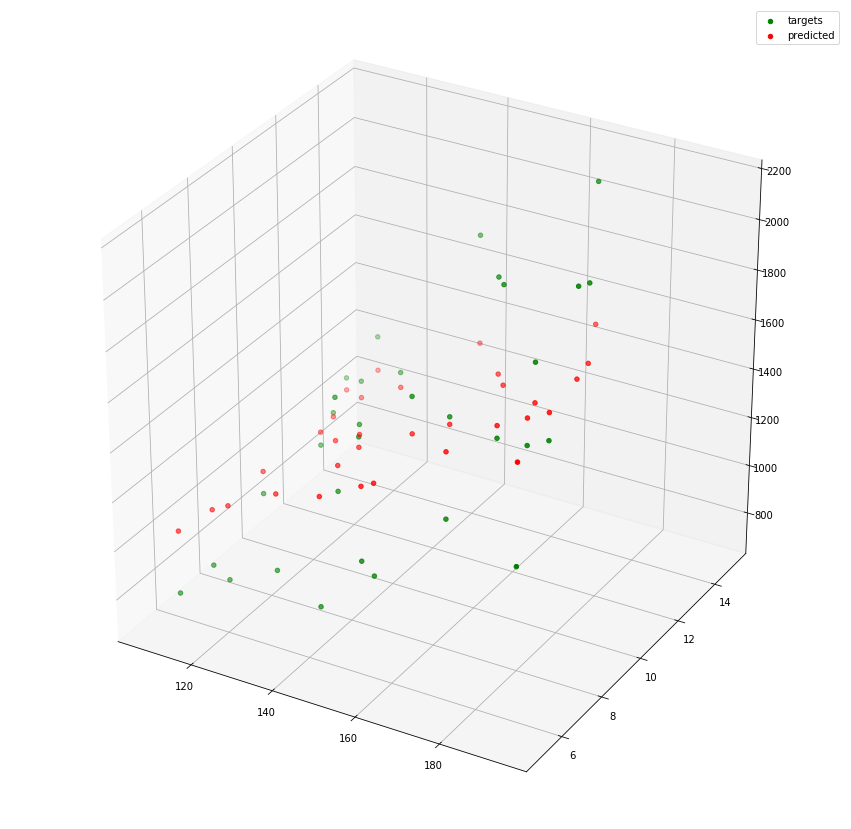

In [37]:
plt.figure(figsize=(15, 15));
ax = plt.axes(projection='3d');

ax.scatter(X[:, 0], X[:, 1], y, color='green', label='targets');
ax.scatter(X[:, 0], X[:, 1], y_pred, color='red', label='predicted');
ax.legend();
plt.show();

In [58]:
print(mreg.forward(X[0, :].reshape(-1, 2)));

[1172.72685064]


## Comparison with SGD classifier from sklearn using `squared_loss`

In [53]:
from sklearn.linear_model import SGDClassifier;

In [61]:
sklr = SGDClassifier(loss='squared_loss', random_state=0).fit(X, y);

sklr_pred = sklr.predict(X);
print(sklr_pred[0], y[0]);

1024 1235
